In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
import torch
import torch.nn as nn

from utils import draw_circuit

In [5]:
sim = 'lightning.qubit' # default.qubit lightning.qubit lightning.gpu
torch_device = "cpu"
shots = 100 # 1000

In [6]:
### Full QC wrapper with a static data structure and variant input and weights only

def quantum_circuit(wires, input_wires, output_wires, rot='Ry'):
    def _quantum_circuit(inputs, weights): 
        # Prepare state H 
        [qml.Hadamard(i) for i in wires]

        # Encode classical -> quantum
        qml.AngleEmbedding(inputs, rotation='Y', wires=input_wires)

        # Process
        if rot == 'Ry':
            qml.BasicEntanglerLayers(weights, rotation=qml.RY, wires=wires)
        elif rot == 'Rxyz':
            qml.StronglyEntanglingLayers(weights, wires=wires)
        
        # Measurement quantum -> classical
        return [qml.expval(qml.PauliZ(wires=w)) for w in output_wires]
    
    return _quantum_circuit

def quantum_circuit_shape(wires, n_layers=1, rot='Ry'):
    if rot == 'Ry':
        shape = qml.BasicEntanglerLayers.shape(n_layers=n_layers, n_wires=wires)
    elif  rot == 'Rxyz':
        shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=wires)
    return shape

In [7]:
### Testing QC

n_qubits = 6
n_layers= 3


n_qubits_input = 1
n_qubits_output = 1

rotation = 'Rxyz'

### Define wires
wires = list(range(n_qubits))
input_wires = list(range(1))
output_wires = list(range(1))

In [8]:
# Data and weight shape
# Prepare test data
data_in = torch.linspace(100, 200, n_qubits_input, requires_grad=False)
print(f'Data shape ({data_in.shape}): \n{data_in}\n')

# Weights
weights_shape = quantum_circuit_shape(n_qubits, n_layers=n_layers, rot=rotation)
test_weights = np.prod(weights_shape)
print(f'QC weight shape: {weights_shape}, total: {test_weights}')

weights_in = torch.rand(weights_shape, requires_grad=True)
print(f'Weights ({weights_in.shape}): \n{weights_in}\n')

Data shape (torch.Size([1])): 
tensor([100.])

QC weight shape: (3, 6, 3), total: 54
Weights (torch.Size([3, 6, 3])): 
tensor([[[0.9193, 0.7057, 0.9355],
         [0.5702, 0.3933, 0.7322],
         [0.6976, 0.5999, 0.4311],
         [0.7774, 0.6652, 0.0289],
         [0.8522, 0.7112, 0.9609],
         [0.6184, 0.1734, 0.7885]],

        [[0.9479, 0.8399, 0.5088],
         [0.2657, 0.9991, 0.7979],
         [0.0166, 0.9789, 0.9577],
         [0.8365, 0.1345, 0.3481],
         [0.1516, 0.2302, 0.8801],
         [0.6462, 0.3348, 0.2687]],

        [[0.7575, 0.7372, 0.2639],
         [0.5609, 0.5329, 0.1302],
         [0.7564, 0.7677, 0.3585],
         [0.3849, 0.4297, 0.9410],
         [0.5351, 0.6668, 0.9037],
         [0.1886, 0.2662, 0.4974]]], requires_grad=True)



Matplotlib is building the font cache; this may take a moment.


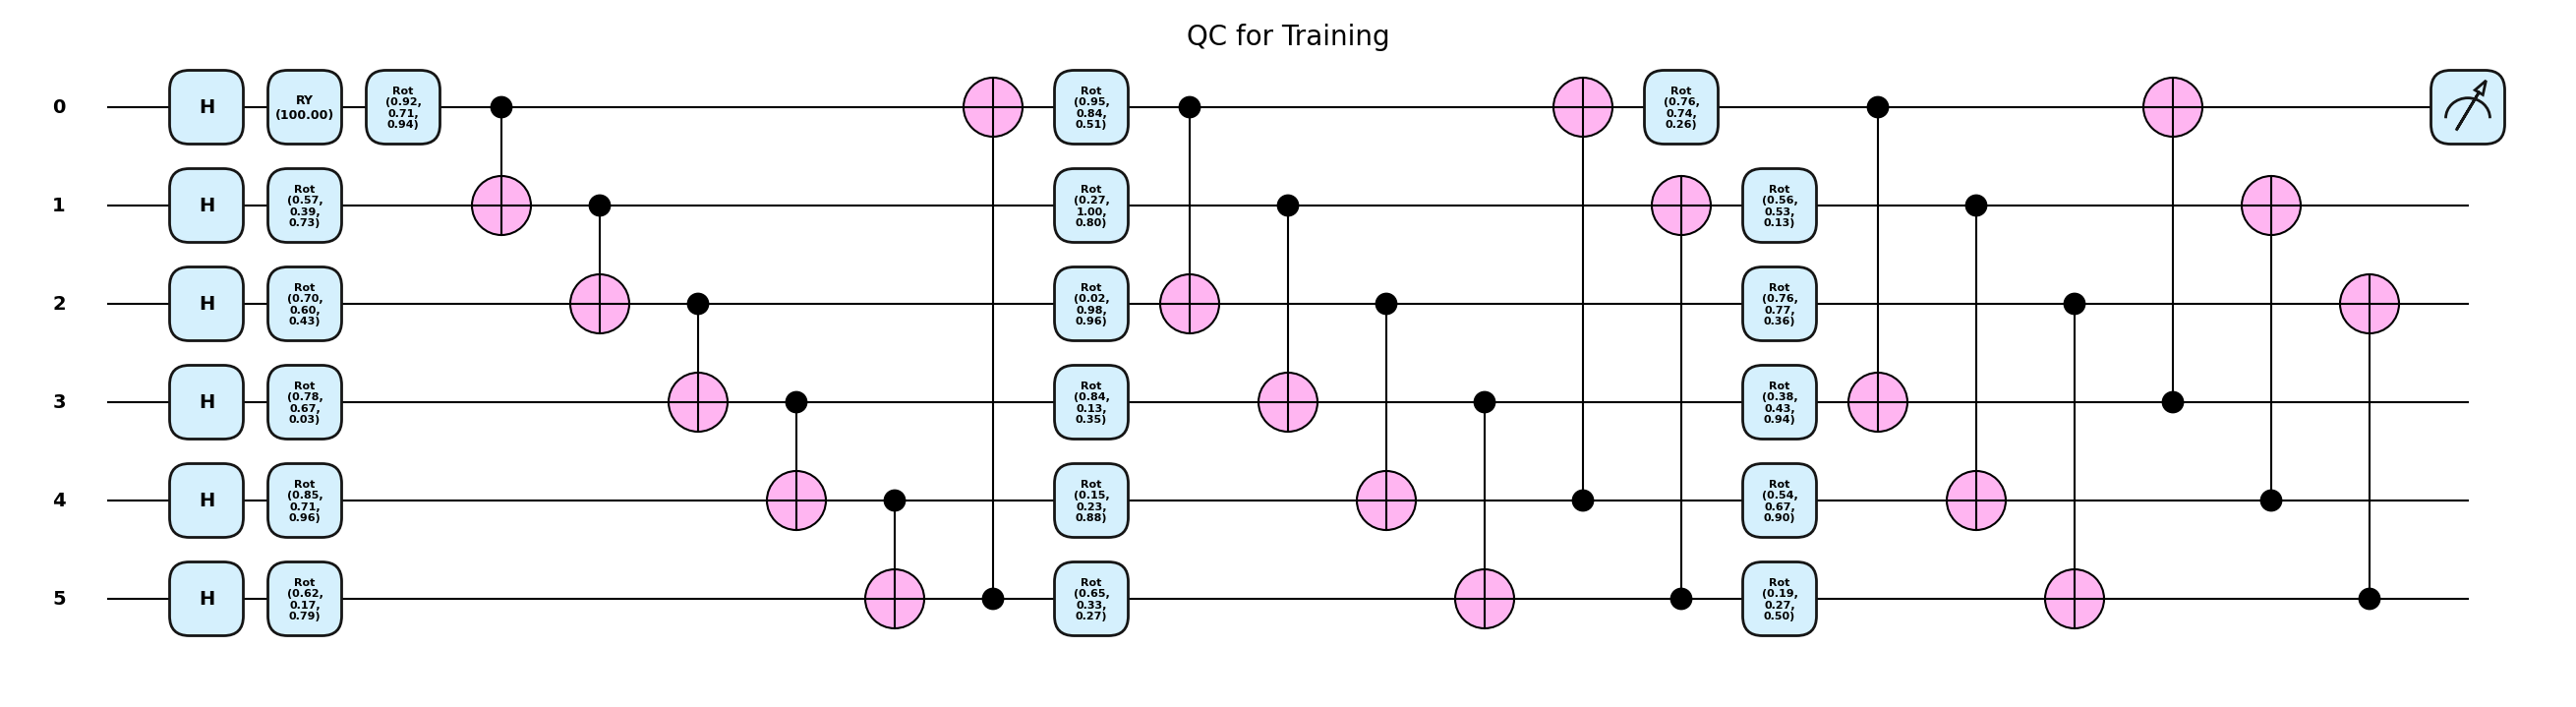

In [9]:
# Define a static QC
qc = quantum_circuit(wires, input_wires=input_wires, output_wires=output_wires, rot=rotation)

# Create and draw a QC
dev = qml.device(sim, wires=n_qubits, shots=shots)
qae_in_qc = qml.QNode(qc, dev, interface='torch', expansion_strategy='gradient')
draw_circuit(qae_in_qc, scale=1, title='QC for Training', expansion_strategy='device') \
    (data_in, weights_in) # expansion_strategy='device'/'gradient'

In [10]:
from model import Pure_QN

In [11]:
shots = 100 # 1000

n_qubits = 6
n_layers= 3

n_qubits_input = 1
n_qubits_output = 1

rotation = 'Rxyz'

### Define wires
wires = list(range(n_qubits))
input_wires = list(range(1))
output_wires = list(range(1))

device = qml.device('default.qubit.torch', wires = n_qubits)# default.qubit lightning.qubit lightning.gpu
torch_device = "cpu"

In [12]:
pure_qc = Pure_QN(
    device,
    n_qubits,
    n_qubits_input,
    n_layers,
    n_qubits_output,
    rotation,
    )